In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 필요하다고 판단되는 라이브러리를 추가하세요.
from sklearn.model_selection import train_test_split

In [29]:
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [2]:
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

In [3]:
import pandas as pd

data = pd.read_csv('train.csv', usecols=lambda column: column != 'Unnamed: 0')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  100000 non-null  object 
 1   A_x        90000 non-null   float64
 2   A_y        90000 non-null   float64
 3   A_z        90000 non-null   float64
 4   B_x        90000 non-null   float64
 5   B_y        90000 non-null   float64
 6   B_z        90000 non-null   float64
 7   label      100000 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 6.1+ MB


In [13]:
import pandas as pd

data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  100000 non-null  datetime64[ns]
 1   A_x        90000 non-null   float64       
 2   A_y        90000 non-null   float64       
 3   A_z        90000 non-null   float64       
 4   B_x        90000 non-null   float64       
 5   B_y        90000 non-null   float64       
 6   B_z        90000 non-null   float64       
 7   label      100000 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 6.1 MB


In [10]:
data.head()

,timestamp,A_x,A_y,A_z,B_x,B_y,B_z,label
0,2019-01-12 00:45:54.450,-0.259130,-0.834869,-0.485499,0.196409,NaN,0.384934,8
1,2000-01-01 01:37:06.440,0.370490,0.175042,0.122625,-0.338242,0.358245,0.126491,2
2,2019-01-12 00:45:33.900,-0.257837,-0.881947,-0.391895,0.196027,0.894537,0.411221,8
3,2000-01-01 00:46:22.680,-0.937753,-0.055961,0.362041,-0.929881,0.087673,0.134609,11
4,2000-01-01 00:49:56.620,-0.988320,-0.190390,0.157909,-0.954669,-0.024810,-0.388420,6


In [6]:
test = pd.read_csv('test.csv', usecols=lambda column: column != 'Unnamed: 0')
test.head()

,timestamp,A_x,A_y,A_z,B_x,B_y,B_z
0,2000-01-01 00:00:42.700,-1.000957,-0.170691,0.124889,-0.979561,0.003150,-0.264673
1,2000-01-01 00:28:38.540,-0.874830,0.132696,-0.501727,-1.274911,0.045122,0.121270
2,2000-01-01 00:07:23.900,-1.219112,0.074678,0.435331,-0.860820,0.222740,0.008689
3,2019-01-12 01:58:44.580,-0.907752,-0.171816,0.211507,-0.972017,0.337799,1.013534
4,2019-01-12 00:59:32.380,-1.031261,0.000340,-0.091693,-0.217434,-0.323466,0.931614


<Axes: xlabel='label', ylabel='count'>

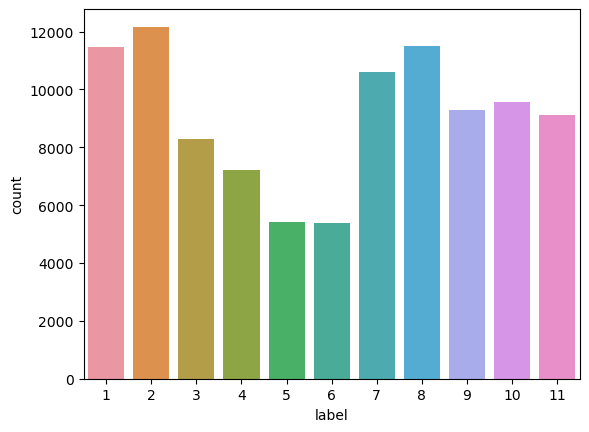

In [12]:
import seaborn as sns
sns.countplot(x='label',data=data)

In [15]:
test['timestamp'] = pd.to_datetime(test['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

In [18]:
data['label'].value_counts()

2     12170
8     11497
1     11465
7     10594
10     9579
9      9282
11     9112
3      8305
4      7208
5      5411
6      5377
Name: label, dtype: int64

# to_datetime

In [16]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['연도'] = data['timestamp'].dt.year
data['월'] = data['timestamp'].dt.month
data['요일'] = data['timestamp'].dt.dayofweek 
data['시간대'] = data['timestamp'].dt.hour
data['분'] = data['timestamp'].dt.minute
data['초'] = data['timestamp'].dt.second
data.info()
data.drop(['timestamp'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  100000 non-null  datetime64[ns]
 1   A_x        90000 non-null   float64       
 2   A_y        90000 non-null   float64       
 3   A_z        90000 non-null   float64       
 4   B_x        90000 non-null   float64       
 5   B_y        90000 non-null   float64       
 6   B_z        90000 non-null   float64       
 7   label      100000 non-null  int64         
 8   연도         100000 non-null  int64         
 9   월          100000 non-null  int64         
 10  요일         100000 non-null  int64         
 11  시간대        100000 non-null  int64         
 12  분          100000 non-null  int64         
 13  초          100000 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(7)
memory usage: 10.7 MB


In [17]:
# 'timestamp' 열을 datetime 형식으로 변환
test['timestamp'] = pd.to_datetime(test['timestamp'])

# '연도', '월', '요일', '시간대' 열 추가
test['연도'] = test['timestamp'].dt.year
test['월'] = test['timestamp'].dt.month
test['요일'] = test['timestamp'].dt.dayofweek
test['시간대'] = test['timestamp'].dt.hour
test['분'] = test['timestamp'].dt.minute
test['초'] = test['timestamp'].dt.second
# 데이터 정보 출력
test.info()

# 'timestamp' 열 삭제
test.drop(['timestamp'], axis=1, inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13234 entries, 0 to 13233
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  13234 non-null  datetime64[ns]
 1   A_x        13234 non-null  float64       
 2   A_y        13234 non-null  float64       
 3   A_z        13234 non-null  float64       
 4   B_x        13234 non-null  float64       
 5   B_y        13234 non-null  float64       
 6   B_z        13234 non-null  float64       
 7   연도         13234 non-null  int64         
 8   월          13234 non-null  int64         
 9   요일         13234 non-null  int64         
 10  시간대        13234 non-null  int64         
 11  분          13234 non-null  int64         
 12  초          13234 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 1.3 MB


In [18]:
data=data.dropna()

In [19]:
x=data.drop(['label'],axis=1)
y=data['label']
X_train,X_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,random_state=42)

# 모델 학습(깡통)

In [30]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
y_pred=model1.predict(X_valid)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Generate the classification report
report1 = classification_report(y_valid,y_pred)
acc1=accuracy_score(y_valid,y_pred)
# Print the report
print(report1)
print(acc1)

              precision    recall  f1-score   support

           1       0.95      0.95      0.95      1228
           2       0.97      0.96      0.96      1307
           3       0.98      0.90      0.94       875
           4       0.95      0.99      0.97       773
           5       0.91      0.99      0.95       599
           6       1.00      0.97      0.98       558
           7       1.00      1.00      1.00      1124
           8       1.00      1.00      1.00      1193
           9       1.00      1.00      1.00       995
          10       0.94      0.95      0.95      1032
          11       0.97      0.97      0.97       960

    accuracy                           0.97     10644
   macro avg       0.97      0.97      0.97     10644
weighted avg       0.97      0.97      0.97     10644

0.9706877113866967


In [22]:
y_pred=model1.predict(test)

In [23]:
result = pd.DataFrame(y_pred).reset_index()
result.columns = ['ID', 'label']


In [24]:
result.to_excel('result.xlsx', index=False)


# 튜닝

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


model = RandomForestClassifier()

# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리의 개수
    'max_depth': [None, 10, 20],     # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10]  # 노드를 분할하기 위한 최소 샘플 개수
}

# GridSearchCV를 사용하여 그리드 서치 수행
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 조합 및 최적 성능 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최적 성능 (정확도):", grid_search.best_score_)

# 최적 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터로 최적 모델 평가
accuracy = best_model.score(X_valid, y_valid)
print("테스트 데이터 정확도:", accuracy)


최적 하이퍼파라미터: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
최적 성능 (정확도): 0.9735055783910745
테스트 데이터 정확도: 0.9729425028184893


In [26]:
y_pred=best_model.predict(test)
result = pd.DataFrame(y_pred).reset_index()
result.columns = ['ID', 'label']

In [27]:
result.to_excel('result.xlsx', index=False)


# 변수 중요도

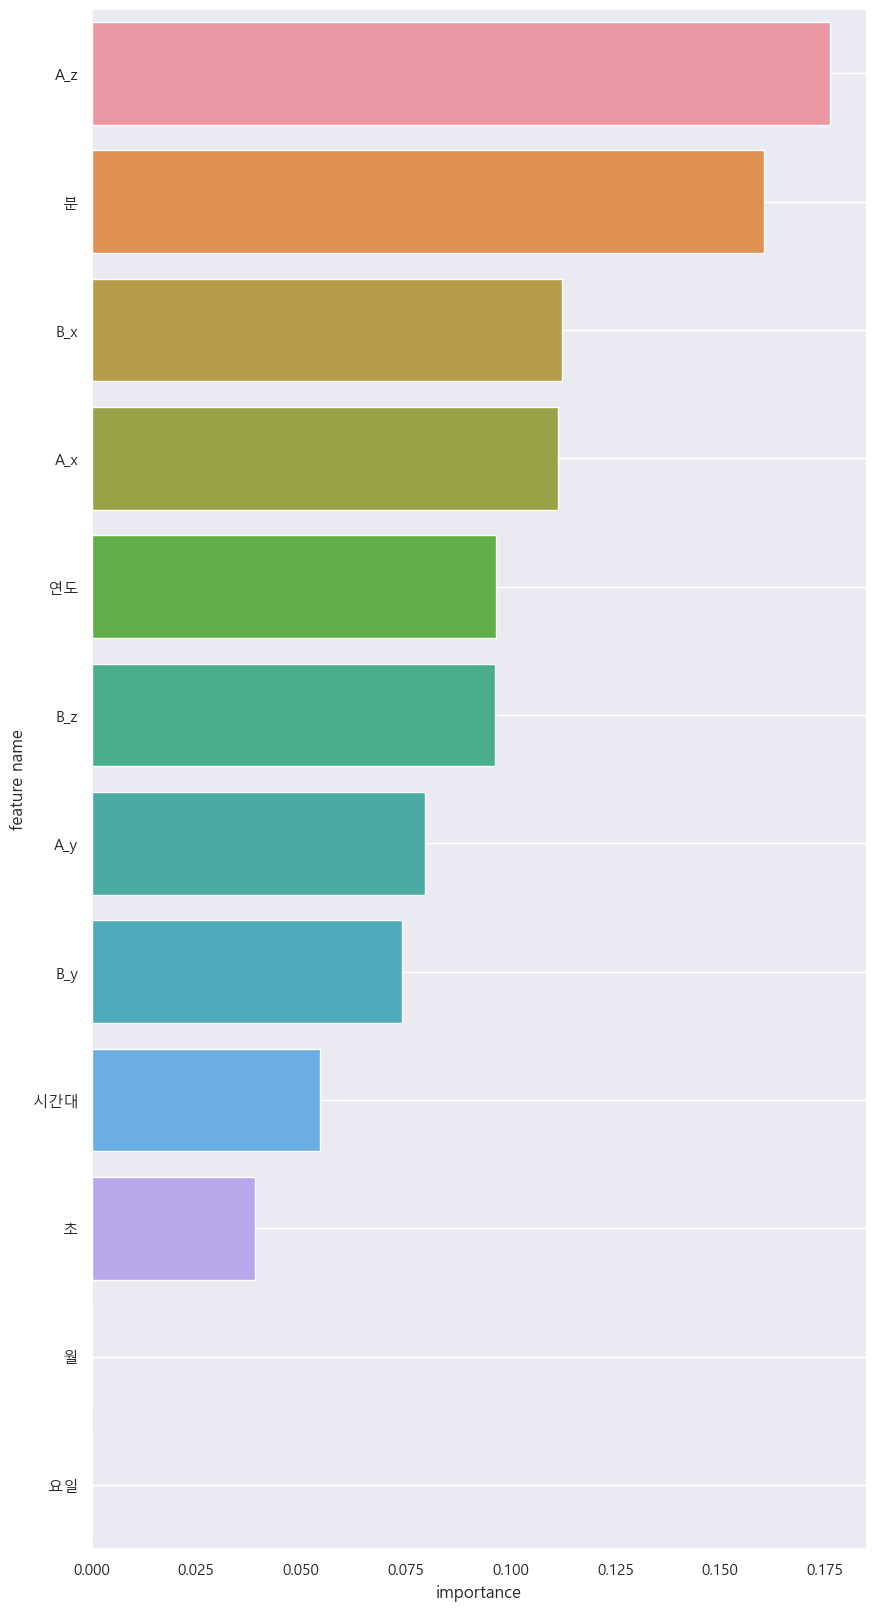

In [33]:
importance = best_model.feature_importances_
names = X_train.columns

fi_df = plot_feature_importance(importance, names)

In [35]:
fi_df

,feature_name,feature_importance
0,A_z,0.176082
1,분,0.160463
2,B_x,0.112178
3,A_x,0.111262
4,연도,0.096538
5,B_z,0.096241
6,A_y,0.079569
7,B_y,0.074003
8,시간대,0.054603
9,초,0.039061


In [36]:
X_train_10 = X_train[fi_df.head(10)['feature_name'].values]
X_valid_10 = X_valid[fi_df.head(10)['feature_name'].values]
test_10 = test[fi_df.head(10)['feature_name'].values]

In [40]:
model2=RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=200)
model2.fit(X_train_10,y_train)

RandomForestClassifier(n_estimators=200)

In [41]:
y_pred=model2.predict(X_valid_10)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Generate the classification report
report2 = classification_report(y_valid,y_pred)
acc2=accuracy_score(y_valid,y_pred)
# Print the report
print(report2)
print(acc2)

              precision    recall  f1-score   support

           1       0.96      0.96      0.96      1228
           2       0.97      0.96      0.96      1307
           3       0.99      0.91      0.95       875
           4       0.95      0.99      0.97       773
           5       0.93      1.00      0.96       599
           6       1.00      0.97      0.99       558
           7       1.00      1.00      1.00      1124
           8       1.00      1.00      1.00      1193
           9       1.00      1.00      1.00       995
          10       0.94      0.96      0.95      1032
          11       0.97      0.97      0.97       960

    accuracy                           0.97     10644
   macro avg       0.97      0.97      0.97     10644
weighted avg       0.97      0.97      0.97     10644

0.9733183013904547


# 표준화

In [42]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# X_train_10을 표준 스케일링
X_train_10_scaled = scaler.fit_transform(X_train_10)

# X_test_10을 표준 스케일링 (주의: X_train_10을 기반으로 변환)
X_valid_10_scaled = scaler.transform(X_valid_10)

# test_10을 표준 스케일링 (주의: X_train_10을 기반으로 변환)
test_10_scaled = scaler.transform(test_10)


In [43]:
model3=RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=200)
model3.fit(X_train_10_scaled,y_train)

RandomForestClassifier(n_estimators=200)

In [44]:
y_pred=model3.predict(X_valid_10_scaled)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Generate the classification report
report3 = classification_report(y_valid,y_pred)
acc3=accuracy_score(y_valid,y_pred)
# Print the report
print(report3)
print(acc3)

              precision    recall  f1-score   support

           1       0.95      0.96      0.96      1228
           2       0.97      0.96      0.97      1307
           3       0.99      0.91      0.95       875
           4       0.95      0.99      0.97       773
           5       0.94      0.99      0.96       599
           6       1.00      0.97      0.99       558
           7       1.00      1.00      1.00      1124
           8       1.00      1.00      1.00      1193
           9       1.00      1.00      1.00       995
          10       0.94      0.96      0.95      1032
          11       0.97      0.97      0.97       960

    accuracy                           0.97     10644
   macro avg       0.97      0.97      0.97     10644
weighted avg       0.97      0.97      0.97     10644

0.9743517474633596


**캐글 성적 상위 5명의 발표를 들은 결과 5명 모두 lightgbm모델을 사용한 것을 보고, 바로 lightgbm 모델로 시도해보았다.**

# lightgbm 깡통모델

In [45]:
import lightgbm as lgb

model4 = lgb.LGBMClassifier()
model4.fit(X_train_10_scaled, y_train)
y_pred = model4.predict(X_valid_10_scaled)

report4 = classification_report(y_valid,y_pred)
acc4=accuracy_score(y_valid,y_pred)
# Print the report
print(report4)
print(acc4)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1653
[LightGBM] [Info] Number of data points in the train set: 42575, number of used features: 10
[LightGBM] [Info] Start training from score -2.149861
[LightGBM] [Info] Start training from score -2.113048
[LightGBM] [Info] Start training from score -2.483475
[LightGBM] [Info] Start training from score -2.626338
[LightGBM] [Info] Start training from score -2.912290
[LightGBM] [Info] Start training from score -2.917055
[LightGBM] [Info] Start training from score -2.237020
[LightGBM] [Info] Start training from score -2.169612
[LightGBM] [Info] Start training from score -2.391317
[LightGBM] [Info] Start training from score -2.356013
[LightGBM] [Info] Start training from score -2.395948
              precision    recall  f1-score   supp

정확도가 단번에 0.991로 높아진 것을 확인

**이번 프로젝트를 하며 느낀점은.. 여태 항상 랜덤포레스트가 평균적으로 항상 정확도가 높아 랜덤포레스트 모델을**

**사용하였는데,성능을 높히기 전에 적어도 모든 깡통모델들로 학습을 시켜보고 정확도가 가장 높은 모델을 이용하여 성능을** 

**높히는 방향으로 가야겠다고 생각했다!!**